In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

In [3]:
df = pd.read_excel('2007-2021-PIT-Counts-by-CoC.xlsx', sheet_name=None )
df2021 = df.get('2021')
df2020 = df.get('2020')
df2019 = df.get('2019')
df2018 = df.get('2018')
df2017 = df.get('2017')
df2016 = df.get('2016')
df2015 = df.get('2015')
df2014 = df.get('2014')
df2013 = df.get('2013')
df2012 = df.get('2012')
df2011 = df.get('2011')

In [4]:
df2021_ver1 = df2021.rename(columns=lambda x: x.rstrip(', 2021')).loc[(df2021['CoC Number'] == 'CA-501')].T.set_axis(['2021'], axis=1)
df2020_ver1 = df2020.rename(columns=lambda x: x.rstrip(', 2020')).loc[(df2020['CoC Number'] == 'CA-501')].T.set_axis(['2020'], axis=1)
df2019_ver1 = df2019.rename(columns=lambda x: x.rstrip(', 2019')).loc[(df2019['CoC Number'] == 'CA-501')].T.set_axis(['2019'], axis=1)
df2018_ver1 = df2018.rename(columns=lambda x: x.rstrip(', 2018')).loc[(df2018['CoC Number'] == 'CA-501')].T.set_axis(['2018'], axis=1)
df2017_ver1 = df2017.rename(columns=lambda x: x.rstrip(', 2017')).loc[(df2017['CoC Number'] == 'CA-501')].T.set_axis(['2017'], axis=1)
df2016_ver1 = df2016.rename(columns=lambda x: x.rstrip(', 2016')).loc[(df2016['CoC Number'] == 'CA-501')].T.set_axis(['2016'], axis=1)
df2015_ver1 = df2015.rename(columns=lambda x: x.rstrip(', 2015')).loc[(df2015['CoC Number'] == 'CA-501')].T.set_axis(['2015'], axis=1)
df2014_ver1 = df2014.rename(columns=lambda x: x.rstrip(', 2014')).loc[(df2014['CoC Number'] == 'CA-501')].T.set_axis(['2014'], axis=1)
df2013_ver1 = df2013.rename(columns=lambda x: x.rstrip(', 2013')).loc[(df2013['CoC Number'] == 'CA-501')].T.set_axis(['2013'], axis=1)
df2012_ver1 = df2012.rename(columns=lambda x: x.rstrip(', 2012')).loc[(df2012['CoC Number'] == 'CA-501')].T.set_axis(['2012'], axis=1)
df2011_ver1 = df2011.rename(columns=lambda x: x.rstrip(', 2011')).loc[(df2011['CoC Number'] == 'CA-501')].T.set_axis(['2011'], axis=1)

In [5]:
dfs = [df2011_ver1, df2012_ver1, df2013_ver1, df2014_ver1, df2015_ver1, df2016_ver1, df2017_ver1, df2018_ver1, df2019_ver1, df2020_ver1, df2021_ver1]

In [6]:
clean_df = pd.concat(dfs, axis=1)
clean_df.head(50)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
CoC Number,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501
CoC Name,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC
Overall Homeless,5669.0,5895.0,7008.0,6408.0,6775.0,6996.0,6858.0,6857.0,8035.0,8124.0,4000
Sheltered ES Homeless,1677.0,1757.0,1919.0,1522.0,1981.0,2197.0,2056.0,2011.0,2412.0,2471.0,3588.0
Sheltered TH Homeless,595.0,742.0,720.0,517.0,420.0,425.0,434.0,474.0,425.0,473.0,412.0
Sheltered SH Homeless,26.0,25.0,54.0,54.0,16.0,16.0,15.0,19.0,18.0,0.0,0.0
Sheltered Total Homeless,2298.0,2524.0,2693.0,2093.0,2417.0,2638.0,2505.0,2504.0,2855.0,2944.0,4000.0
Unsheltered Homeless,3371.0,3371.0,4315.0,4315.0,4358.0,4358.0,4353.0,4353.0,5180.0,5180.0,0
Overall Homeless Individuals,5034.0,5177.0,6329.0,5776.0,6175.0,6309.0,6257.0,6211.0,7404.0,7609.0,NaN
Overall Homeless Individuals - Under 18,38.0,35.0,134.0,140.0,125.0,131.0,104.0,NaN,54.0,73.0,NaN


In [7]:
clean_df.replace(np.nan,0).head(50)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
CoC Number,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501,CA-501
CoC Name,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC,San Francisco CoC
Overall Homeless,5669.0,5895.0,7008.0,6408.0,6775.0,6996.0,6858.0,6857.0,8035.0,8124.0,4000
Sheltered ES Homeless,1677.0,1757.0,1919.0,1522.0,1981.0,2197.0,2056.0,2011.0,2412.0,2471.0,3588.0
Sheltered TH Homeless,595.0,742.0,720.0,517.0,420.0,425.0,434.0,474.0,425.0,473.0,412.0
Sheltered SH Homeless,26.0,25.0,54.0,54.0,16.0,16.0,15.0,19.0,18.0,0.0,0.0
Sheltered Total Homeless,2298.0,2524.0,2693.0,2093.0,2417.0,2638.0,2505.0,2504.0,2855.0,2944.0,4000.0
Unsheltered Homeless,3371.0,3371.0,4315.0,4315.0,4358.0,4358.0,4353.0,4353.0,5180.0,5180.0,0
Overall Homeless Individuals,5034.0,5177.0,6329.0,5776.0,6175.0,6309.0,6257.0,6211.0,7404.0,7609.0,0
Overall Homeless Individuals - Under 18,38.0,35.0,134.0,140.0,125.0,131.0,104.0,0,54.0,73.0,0


In [8]:
# pull out Overall Homeless row and make it a Series
bar_graph_df = pd.DataFrame(clean_df.loc["Overall Homeless"])
# Convert Series to Dataframe for making bar and line graphs
bar_graph = pd.DataFrame(bar_graph_df)
bar_graph

,Overall Homeless
2011,5669.0
2012,5895.0
2013,7008.0
2014,6408.0
2015,6775.0
2016,6996.0
2017,6858.0
2018,6857.0
2019,8035.0
2020,8124.0


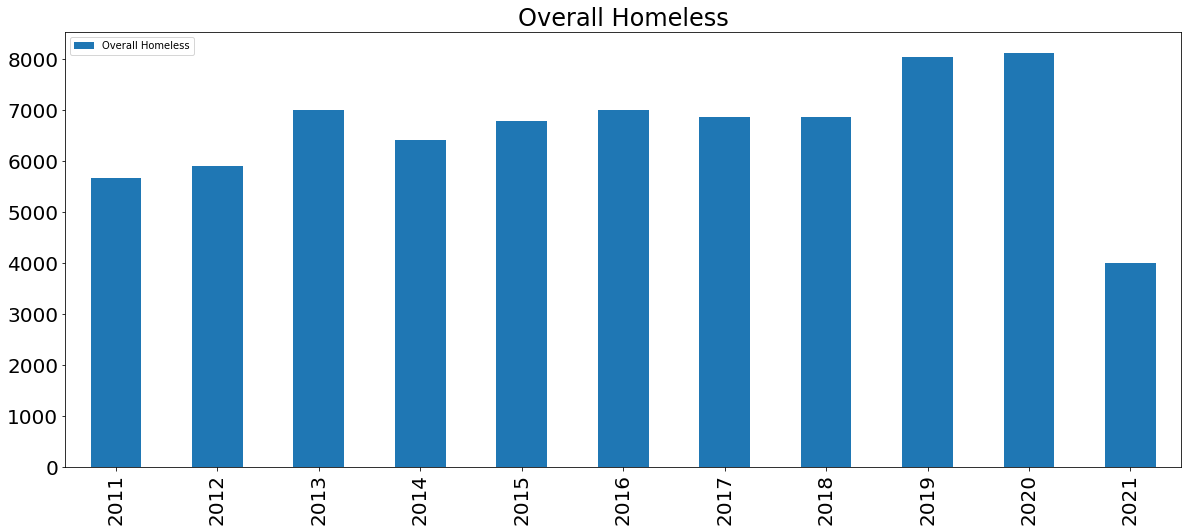

<Figure size 432x288 with 0 Axes>

In [45]:
# Use DataFrame.plot() in order to create a bar chart of the data
bar_graph.plot(kind="bar", figsize=(20,8))

# Set a title for the chart
plt.title("Overall Homeless", fontdict={'fontsize':24})
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)


# Plot Overall Homeless Bar Chart
plt.show()
plt.tight_layout()

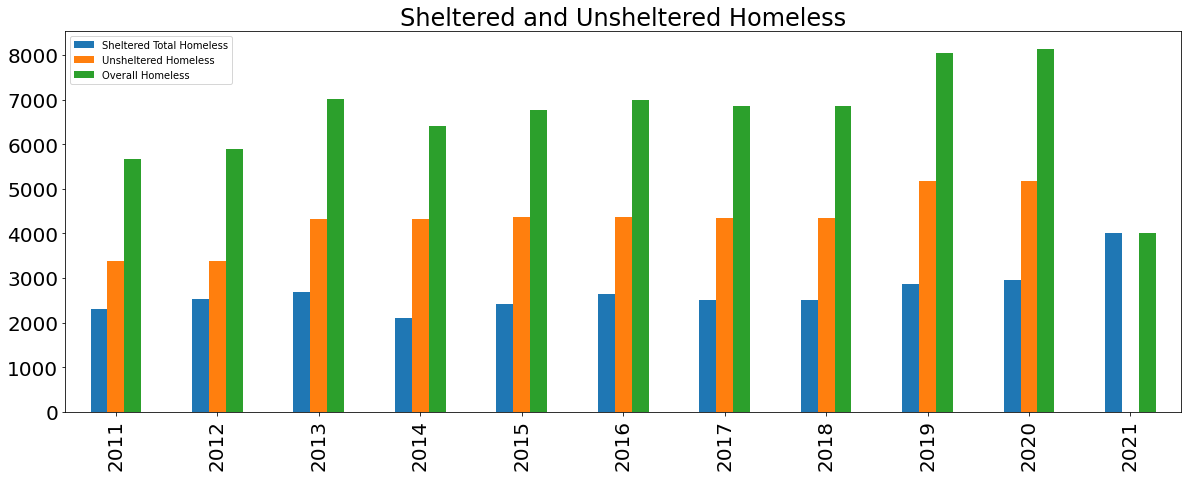

In [47]:
# pull out Overall Homeless row and make it a Series
unsheltered_df = pd.DataFrame(clean_df.loc["Unsheltered Homeless"])
sheltered_df = pd.DataFrame(clean_df.loc["Sheltered Total Homeless"])

# Convert Series to Dataframe for making bar and line graphs
sheltered_unsheltered = pd.DataFrame(unsheltered_df)
# sheltered_unsheltered_df = sheltered_unsheltered.append("sheltered_df")
extracted_sheltered = sheltered_df["Sheltered Total Homeless"]
sheltered_unsheltered1_df = sheltered_unsheltered.join(extracted_sheltered)
sheltered_unsheltered2_df = sheltered_unsheltered1_df.join(bar_graph_df)
sheltered_unsheltered2_df

sheltered_unsheltered2_df.plot( y=["Sheltered Total Homeless", "Unsheltered Homeless", "Overall Homeless"], kind="bar", figsize=(20,7))
plt.title("Sheltered and Unsheltered Homeless", fontdict={'fontsize':24})
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

